In [2]:
import json
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import collections
import pickle
import numpy as np
DATA_PATH='AllChapters/'

In [2]:
data = pickle.load(open(DATA_PATH+'chapters.pkl','rb'))
len(data)

817076

In [44]:
import random

candidates = list(data)
val = random.sample(candidates, 8200)
vals = set(val)
candidates = [x for x in candidates if x not in vals]
test = random.sample(candidates, 8200)
tests = set(test)
train = [x for x in candidates if x not in vals and x not in tests]
train10p = random.sample(train, len(train) // 10)
train1p = random.sample(train10p, len(train10p) // 10)

In [45]:
json.dump(train, open(DATA_PATH+'train.json','w'))
json.dump(train10p, open(DATA_PATH+'train10p.json','w'))
json.dump(train1p, open(DATA_PATH+'train1p.json','w'))
json.dump(val, open(DATA_PATH+'val.json','w'))
json.dump(test, open(DATA_PATH+'test.json','w'))

214


/tmp/ipykernel_1457679/1383309967.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Pastel1')


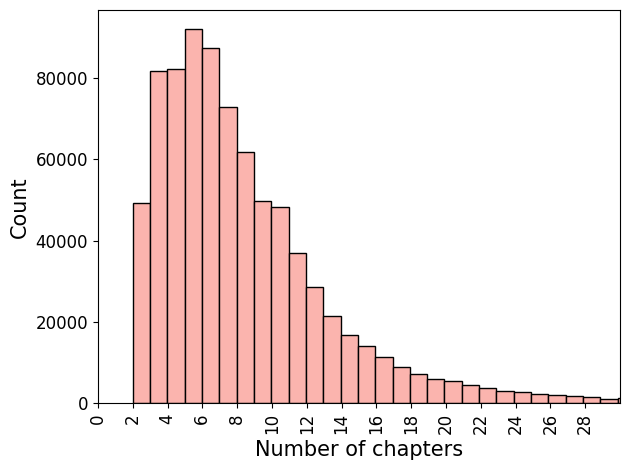

In [4]:
# Number of chapters

l = []
for x in data.values():
    l.append(len(x['chapters']))

# Create a histogram with 10 bins
n_bins = (int(max(l)) + 1 - int(min(l)))
n, bins, patches = plt.hist(l, bins=n_bins, histtype='bar', ec='black')
print(len(bins))

# Add colors
cm = plt.cm.get_cmap('Pastel1')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_centers = bin_centers[:30]
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    # plt.setp(p, 'facecolor', cm(c))
    plt.setp(p, 'facecolor', cm(0))

# Set the x-axis label
plt.xlabel('Number of chapters', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(range(0, 30, 2), fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlim(0, 30)
plt.tight_layout()

# Show the plot
plt.savefig('nbchapters.pdf', dpi=1200)
plt.show()

In [42]:
# Average number of chapters
sum(l) / len(l)

8.339165512143301

/tmp/ipykernel_1457679/1174847135.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Pastel1')


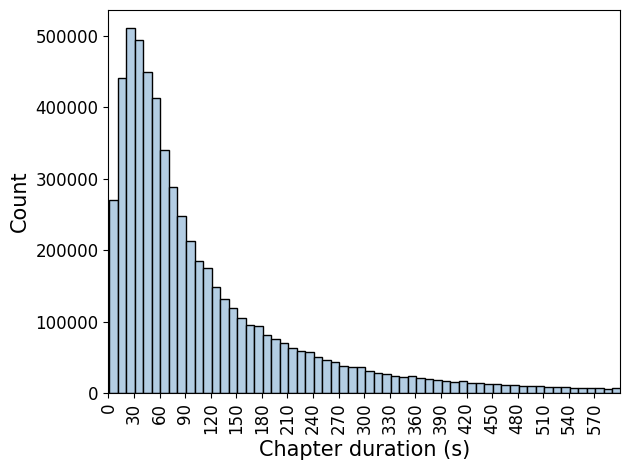

In [5]:
# Chapter duration

l = []
for x in data.values():
    x = x['chapters']
    for i, chapter in enumerate(x[:-1]):
        l.append(x[i+1]['time'] - chapter['time'])

# Create a histogram with 10 bins
n_bins = (int(max(l)) + 1 - int(min(l))) // 10
n, bins, patches = plt.hist(l, bins=n_bins, histtype='bar', ec='black')

# Add colors
cm = plt.cm.get_cmap('Pastel1')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_centers = bin_centers[:60]
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    # plt.setp(p, 'facecolor', cm(c))
    plt.setp(p, 'facecolor', cm(1/5))

# Set the x-axis label
plt.xlabel('Chapter duration (s)', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(range(0, 600, 30), fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlim(0, 600)
plt.tight_layout()

# Show the plot
plt.savefig('durchapters.pdf', dpi=1200)
plt.show()

In [38]:
# Average chapter duration
sum(l) / len(l)

142.0131353207521

/tmp/ipykernel_1457679/2544723197.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Pastel1')


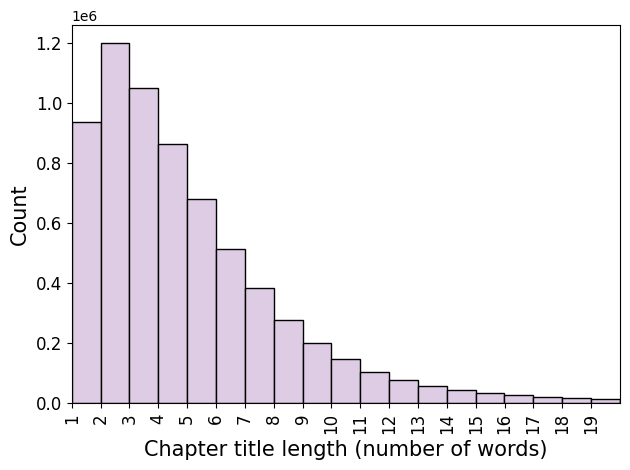

In [6]:
# Length of chapter titles

l = []
for x in data.values():
    x = x['chapters']
    for chapter in x:
        l.append(len(chapter['label'].strip().split(' ')))

# Create a histogram with 10 bins
n_bins = int(max(l)) + 1 - int(min(l))
n, bins, patches = plt.hist(l, bins=n_bins, histtype='bar', ec='black')

# Add colors
cm = plt.cm.get_cmap('Pastel1')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_centers = bin_centers[:20]
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    # plt.setp(p, 'facecolor', cm(c))
    plt.setp(p, 'facecolor', cm(2/5))

# Set the x-axis label
plt.xlabel('Chapter title length (number of words)', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(range(1, 20), fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlim(1, 20)
plt.tight_layout()

# Show the plot
plt.savefig('lenchapters.pdf', dpi=1200)
plt.show()

In [40]:
# Average length of chapter titles
sum(l) / len(l)

5.367835130586292

In [5]:
data = pickle.load(open(DATA_PATH+'chapters_cat_vidpath_chaplangcat.pkl','rb'))
len(data)

817076

In [3]:
languages = [
    ('aa', 'Afar'),
    ('ab', 'Abkhazian'),
    ('af', 'Afrikaans'),
    ('ak', 'Akan'),
    ('sq', 'Albanian'),
    ('am', 'Amharic'),
    ('ar', 'Arabic'),
    ('an', 'Aragonese'),
    ('hy', 'Armenian'),
    ('as', 'Assamese'),
    ('av', 'Avaric'),
    ('ae', 'Avestan'),
    ('ay', 'Aymara'),
    ('az', 'Azerbaijani'),
    ('ba', 'Bashkir'),
    ('bm', 'Bambara'),
    ('eu', 'Basque'),
    ('be', 'Belarusian'),
    ('bn', 'Bengali'),
    ('bh', 'Bihari languages'),
    ('bi', 'Bislama'),
    ('bo', 'Tibetan'),
    ('bs', 'Bosnian'),
    ('br', 'Breton'),
    ('bg', 'Bulgarian'),
    ('my', 'Burmese'),
    ('ca', 'Catalan; Valencian'),
    ('cs', 'Czech'),
    ('ch', 'Chamorro'),
    ('ce', 'Chechen'),
    ('zh', 'Chinese'),
    ('cu', 'Church Slavic; Old Slavonic; Church Slavonic; Old Bulgarian; Old Church Slavonic'),
    ('cv', 'Chuvash'),
    ('kw', 'Cornish'),
    ('co', 'Corsican'),
    ('cr', 'Cree'),
    ('cy', 'Welsh'),
    ('cs', 'Czech'),
    ('da', 'Danish'),
    ('de', 'German'),
    ('dv', 'Divehi; Dhivehi; Maldivian'),
    ('nl', 'Dutch; Flemish'),
    ('dz', 'Dzongkha'),
    ('el', 'Greek, Modern (1453-)'),
    ('en', 'English'),
    ('eo', 'Esperanto'),
    ('et', 'Estonian'),
    ('eu', 'Basque'),
    ('ee', 'Ewe'),
    ('fo', 'Faroese'),
    ('fa', 'Persian'),
    ('fj', 'Fijian'),
    ('fi', 'Finnish'),
    ('fr', 'French'),
    ('fy', 'Western Frisian'),
    ('ff', 'Fulah'),
    ('Ga', 'Georgian'),
    ('de', 'German'),
    ('gd', 'Gaelic; Scottish Gaelic'),
    ('ga', 'Irish'),
    ('gl', 'Galician'),
    ('gv', 'Manx'),
    ('el', 'Greek, Modern (1453-)'),
    ('gn', 'Guarani'),
    ('gu', 'Gujarati'),
    ('ht', 'Haitian; Haitian Creole'),
    ('ha', 'Hausa'),
    ('he', 'Hebrew'),
    ('hz', 'Herero'),
    ('hi', 'Hindi'),
    ('ho', 'Hiri Motu'),
    ('hr', 'Croatian'),
    ('hu', 'Hungarian'),
    ('hy', 'Armenian'),
    ('ig', 'Igbo'),
    ('is', 'Icelandic'),
    ('io', 'Ido'),
    ('ii', 'Sichuan Yi; Nuosu'),
    ('iu', 'Inuktitut'),
    ('ie', 'Interlingue; Occidental'),
    ('ia', 'Interlingua (International Auxiliary Language Association)'),
    ('id', 'Indonesian'),
    ('ik', 'Inupiaq'),
    ('is', 'Icelandic'),
    ('it', 'Italian'),
    ('jv', 'Javanese'),
    ('ja', 'Japanese'),
    ('kl', 'Kalaallisut; Greenlandic'),
    ('kn', 'Kannada'),
    ('ks', 'Kashmiri'),
    ('ka', 'Georgian'),
    ('kr', 'Kanuri'),
    ('kk', 'Kazakh'),
    ('km', 'Central Khmer'),
    ('ki', 'Kikuyu; Gikuyu'),
    ('rw', 'Kinyarwanda'),
    ('ky', 'Kirghiz; Kyrgyz'),
    ('kv', 'Komi'),
    ('kg', 'Kongo'),
    ('ko', 'Korean'),
    ('kj', 'Kuanyama; Kwanyama'),
    ('ku', 'Kurdish'),
    ('lo', 'Lao'),
    ('la', 'Latin'),
    ('lv', 'Latvian'),
    ('li', 'Limburgan; Limburger; Limburgish'),
    ('ln', 'Lingala'),
    ('lt', 'Lithuanian'),
    ('lb', 'Luxembourgish; Letzeburgesch'),
    ('lu', 'Luba-Katanga'),
    ('lg', 'Ganda'),
    ('mk', 'Macedonian'),
    ('mh', 'Marshallese'),
    ('ml', 'Malayalam'),
    ('mi', 'Maori'),
    ('mr', 'Marathi'),
    ('ms', 'Malay'),
    ('Mi', 'Micmac'),
    ('mk', 'Macedonian'),
    ('mg', 'Malagasy'),
    ('mt', 'Maltese'),
    ('mn', 'Mongolian'),
    ('mi', 'Maori'),
    ('ms', 'Malay'),
    ('my', 'Burmese'),
    ('na', 'Nauru'),
    ('nv', 'Navajo; Navaho'),
    ('nr', 'Ndebele, South; South Ndebele'),
    ('nd', 'Ndebele, North; North Ndebele'),
    ('ng', 'Ndonga'),
    ('ne', 'Nepali'),
    ('nl', 'Dutch; Flemish'),
    ('nn', 'Norwegian Nynorsk; Nynorsk, Norwegian'),
    ('nb', 'Bokmål, Norwegian; Norwegian Bokmål'),
    ('no', 'Norwegian'),
    ('oc', 'Occitan (post 1500)'),
    ('oj', 'Ojibwa'),
    ('or', 'Oriya'),
    ('om', 'Oromo'),
    ('os', 'Ossetian; Ossetic'),
    ('pa', 'Panjabi; Punjabi'),
    ('fa', 'Persian'),
    ('pi', 'Pali'),
    ('pl', 'Polish'),
    ('pt', 'Portuguese'),
    ('ps', 'Pushto; Pashto'),
    ('qu', 'Quechua'),
    ('rm', 'Romansh'),
    ('ro', 'Romanian; Moldavian; Moldovan'),
    ('ro', 'Romanian; Moldavian; Moldovan'),
    ('rn', 'Rundi'),
    ('ru', 'Russian'),
    ('sg', 'Sango'),
    ('sa', 'Sanskrit'),
    ('si', 'Sinhala; Sinhalese'),
    ('sk', 'Slovak'),
    ('sk', 'Slovak'),
    ('sl', 'Slovenian'),
    ('se', 'Northern Sami'),
    ('sm', 'Samoan'),
    ('sn', 'Shona'),
    ('sd', 'Sindhi'),
    ('so', 'Somali'),
    ('st', 'Sotho, Southern'),
    ('es', 'Spanish; Castilian'),
    ('sq', 'Albanian'),
    ('sc', 'Sardinian'),
    ('sr', 'Serbian'),
    ('ss', 'Swati'),
    ('su', 'Sundanese'),
    ('sw', 'Swahili'),
    ('sv', 'Swedish'),
    ('ty', 'Tahitian'),
    ('ta', 'Tamil'),
    ('tt', 'Tatar'),
    ('te', 'Telugu'),
    ('tg', 'Tajik'),
    ('tl', 'Tagalog'),
    ('th', 'Thai'),
    ('bo', 'Tibetan'),
    ('ti', 'Tigrinya'),
    ('to', 'Tonga (Tonga Islands)'),
    ('tn', 'Tswana'),
    ('ts', 'Tsonga'),
    ('tk', 'Turkmen'),
    ('tr', 'Turkish'),
    ('tw', 'Twi'),
    ('ug', 'Uighur; Uyghur'),
    ('uk', 'Ukrainian'),
    ('ur', 'Urdu'),
    ('uz', 'Uzbek'),
    ('ve', 'Venda'),
    ('vi', 'Vietnamese'),
    ('vo', 'Volapük'),
    ('cy', 'Welsh'),
    ('wa', 'Walloon'),
    ('wo', 'Wolof'),
    ('xh', 'Xhosa'),
    ('yi', 'Yiddish'),
    ('yo', 'Yoruba'),
    ('za', 'Zhuang; Chuang'),
    ('zh', 'Chinese'),
    ('zu', 'Zulu')
]
languages = {x[0]: x[1] for x in languages}

In [6]:
# Chapter languages stats

chap_languages = collections.Counter([x['chapters_language'] for x in data.values() if x['chapters_language'] is not None])
print(len(chap_languages))
print(sum(chap_languages.values()))
print(chap_languages['en'] / sum(chap_languages.values()))
print(chap_languages.most_common(34))
print(sum(x[0] in languages for x in chap_languages.most_common(30)))

49
815494
0.9292024220901687
[('en', 757759), ('de', 15180), ('fr', 5680), ('it', 5508), ('es', 4840), ('tl', 3009), ('ca', 2720), ('pt', 2445), ('id', 2411), ('nl', 2073), ('af', 1768), ('sv', 1339), ('ro', 1259), ('no', 945), ('ru', 715), ('ko', 701), ('so', 700), ('hi', 689), ('et', 667), ('da', 620), ('pl', 604), ('vi', 542), ('sw', 519), ('cy', 380), ('sq', 315), ('ja', 304), ('sl', 275), ('fi', 250), ('lt', 242), ('hr', 180), ('tr', 176), ('hu', 111), ('lv', 108), ('cs', 104)]
30


/tmp/ipykernel_3716775/4015461591.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Pastel1')


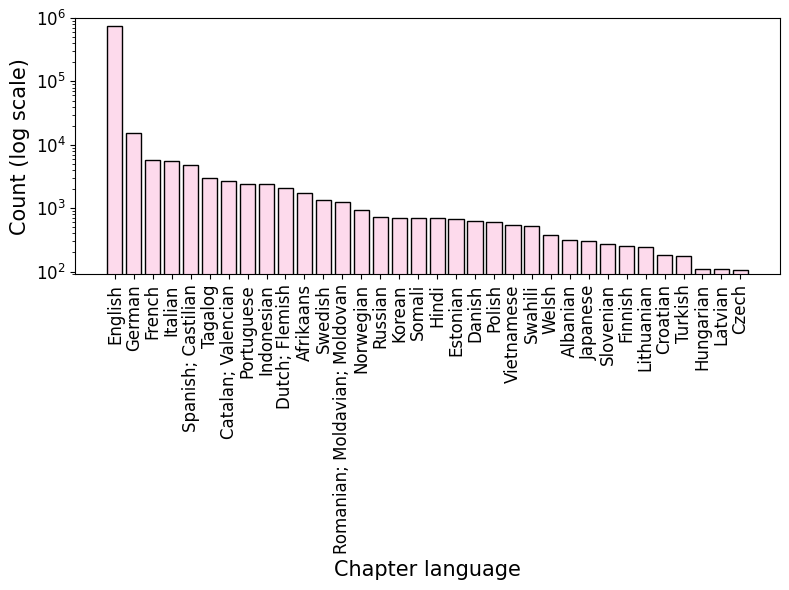

In [14]:
# Chapter languages

common_labels, common_counts = zip(*chap_languages.most_common(34))
cm = plt.cm.get_cmap('Pastel1')
plt.bar(range(len(common_labels)), common_counts, ec='black', color=cm(4/5))  # color=[cm(i/len(common_labels)) for i in range(len(common_labels))])
plt.xticks(range(len(common_labels)), [languages[x] for x in common_labels], rotation=90, fontsize=12)
plt.xlabel('Chapter language', fontsize=15)
plt.yscale('log')
plt.yticks(fontsize=12)
plt.ylim(90, 1000000)
plt.ylabel('Count (log scale)', fontsize=15)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (8,6)
plt.savefig('langchapters.pdf', dpi=1200)
plt.show()

In [13]:
# Video categories stats

categories = collections.Counter([x['categories'][0] for x in data.values() if x['categories'] is not None])
print(len(categories))
print(sum(categories.values()))
print(categories['Howto & Style'] / sum(categories.values()))
print(categories.most_common())

15
815965
0.17027691138713058
[('Howto & Style', 138940), ('Education', 123428), ('People & Blogs', 103919), ('Entertainment', 97741), ('Science & Technology', 75965), ('Gaming', 62231), ('Music', 53705), ('Sports', 39313), ('Autos & Vehicles', 35605), ('News & Politics', 23001), ('Film & Animation', 22643), ('Travel & Events', 22181), ('Pets & Animals', 6215), ('Nonprofits & Activism', 6097), ('Comedy', 4981)]


/tmp/ipykernel_1457679/1121888569.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Pastel1')


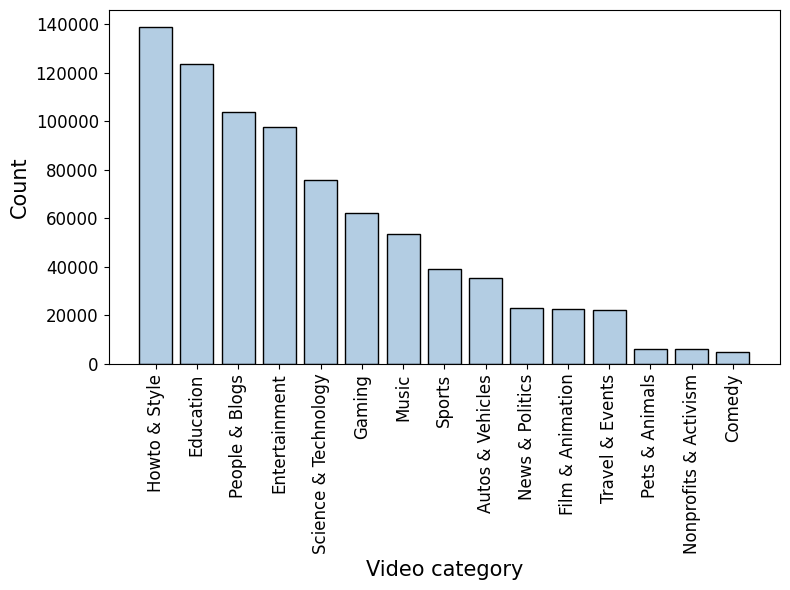

In [14]:
# Video categories

common_labels, common_counts = zip(*categories.most_common())
cm = plt.cm.get_cmap('Pastel1')
plt.bar(range(len(common_labels)), common_counts, ec='black', color=cm(1))  # color=[cm(i/len(common_labels)) for i in range(len(common_labels))])
plt.xticks(range(len(common_labels)), common_labels, rotation='vertical', fontsize=12)
plt.xlabel('Video category', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('catvideo.pdf', dpi=1200)
plt.show()

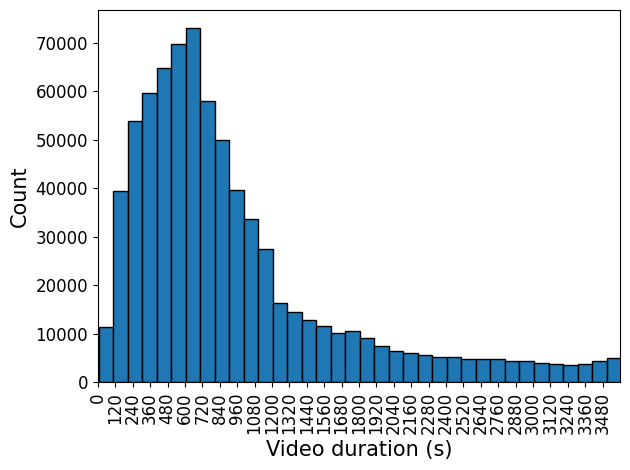

In [42]:
# Video durations

l = [x['duration'] for x in data.values()]

# Create a histogram with 10 bins
n_bins = (int(max(l)) + 1 - int(min(l))) // 100
plt.hist(l, bins=n_bins, histtype='bar', ec='black')

# Set the x-axis label
plt.xlabel('Video duration (s)', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(range(0, 3600, 120), fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlim(0, 3600)
plt.tight_layout()

# Show the plot
plt.savefig('durvideo.pdf', dpi=1200)
plt.show()

/tmp/ipykernel_1457679/1280068729.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Pastel1')


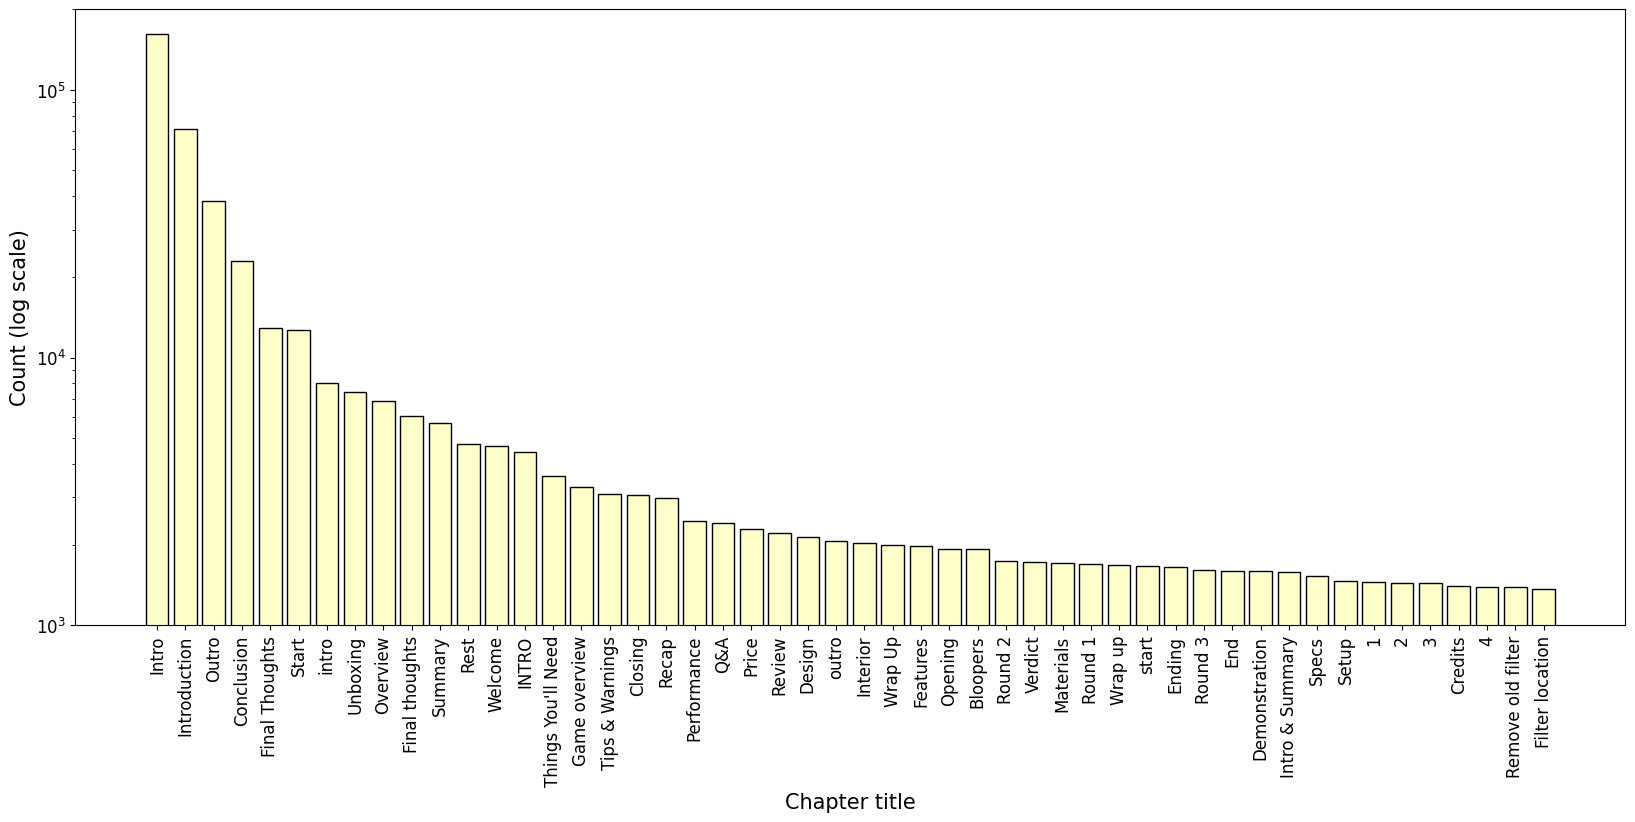

In [19]:
# Most common chapter titles

words = [chapter['label'] for x in data.values() for chapter in x['chapters']]
# Count the frequency of each word
word_counts = collections.Counter(words)

# Get the 10 most common words and their counts
top_words = word_counts.most_common(50)

# Create a bar chart of the top 10 most common words
cm = plt.cm.get_cmap('Pastel1')
plt.bar([word[0] for word in top_words], [word[1] for word in top_words], ec='black', color=cm(3/5))  # color=[cm(i/50) for i in range(50)])

# Set the x-axis label
plt.xlabel('Chapter title', fontsize=15)
plt.xticks(rotation=90, fontsize=12)

# Set the y-axis label
plt.yscale('log')
plt.ylabel('Count (log scale)', fontsize=15)
plt.ylim(10**3, 2*10**5)
plt.yticks(fontsize=12)

# Set the title of the plot
# plt.title('Most common chapter titles')

plt.rcParams["figure.figsize"] = (20,8)

# Show the plot 
plt.savefig('commonchapters.pdf', dpi=1200, bbox_inches='tight')
plt.show()

In [7]:
top_words[:10]

[('Intro', 161435),
 ('Introduction', 71590),
 ('Outro', 38362),
 ('Conclusion', 22880),
 ('Final Thoughts', 12857),
 ('Start', 12617),
 ('intro', 8062),
 ('Unboxing', 7425),
 ('Overview', 6894),
 ('Final thoughts', 6065)]

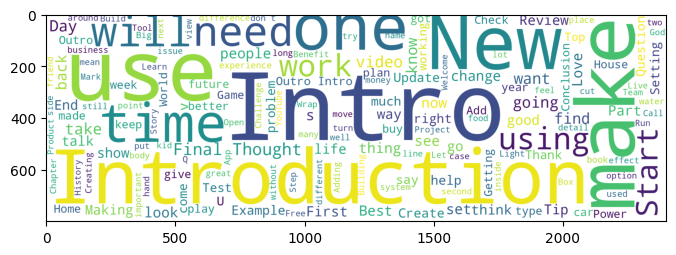

In [15]:
# Word cloud for chapters

wc = WordCloud(width = 2400, height = 800, background_color ='white', min_font_size = 30).generate(" ".join([chapter['label'] for x in data.values() for chapter in x['chapters']]))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.savefig('chapterwordcloud.pdf', dpi=1200, bbox_inches='tight')

In [2]:
asr = pickle.load(open(DATA_PATH+'chapters_asr_whisper_align_proc_10000.pkl','rb'))

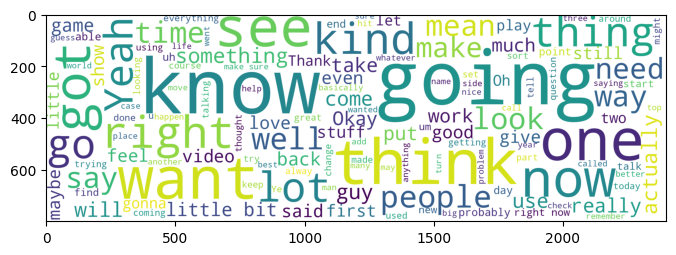

In [13]:
# Word cloud for ASR

wc = WordCloud(width = 2400, height = 800, background_color ='white', min_font_size = 30).generate(" ".join(" ".join(x["text"]) for x in asr.values()))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.savefig('asrwordcloud.pdf', dpi=1200, bbox_inches='tight')

In [ ]:
data = pickle.load(open(DATA_PATH+'visual_sim.pkl','rb'))
len(data)

In [ ]:
# Visual-text similarity

l = []
for x in data.values():
    l.extend(x['averages'])

# Create a histogram with 10 bins
n, bins, patches = plt.hist(l, bins=20, histtype='bar', ec='black')

# Add colors
cm = plt.cm.get_cmap('Pastel1')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_centers = bin_centers[:100]
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(0))

# Set the x-axis label
plt.xlabel('Average visual-text similarity', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(range(0, 100, 5), fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlim(0, 100)
plt.tight_layout()

# Show the plot
plt.savefig('visualsim.pdf', dpi=1200)
plt.show()